In [2]:
#importing Libraries and their associated methods
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [3]:
#Determing the total number of images and labels
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


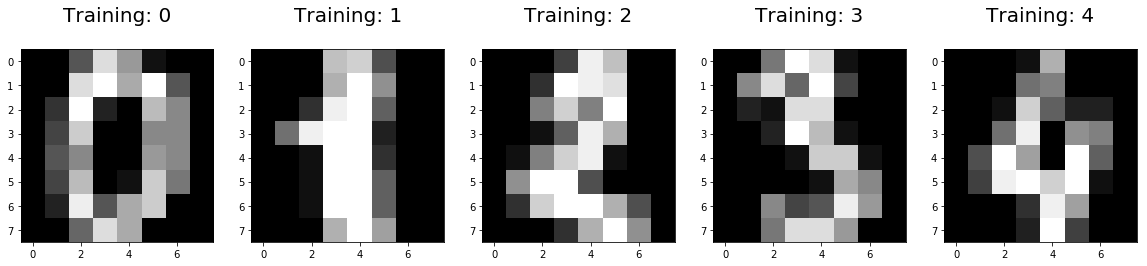

In [50]:
#Display some of the images and labels
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap='gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [17]:
print(x_train.shape)

(1383, 64)


In [18]:
print(y_train.shape)

(1383,)


In [19]:
print(x_test.shape)

(414, 64)


In [20]:
print(y_test.shape)

(414,)


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
#Returns a Numpy Array
#Predict for One Observation (image)

print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [25]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [26]:
predictions = logisticRegr.predict(x_test)

In [27]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9420289855072463


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [30]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


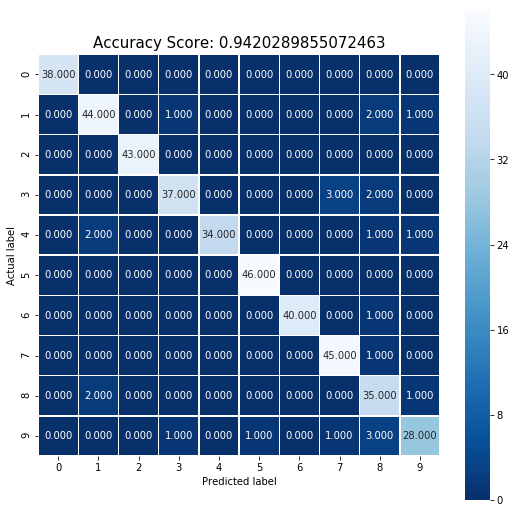

In [52]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt=".3f", linewidths= .5, square = True, cmap='Blues_r');       
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

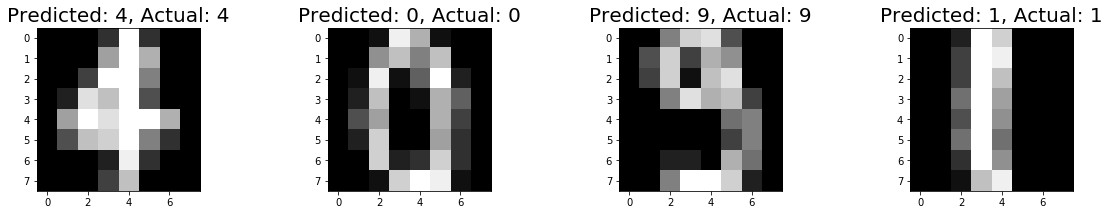

In [54]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
        index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap='gray')
    plt.title("Predicted: {}, Actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize=20)